In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('BNS_full.csv')
d = pd.concat([d, pd.read_csv('NSBH_full.csv')], ignore_index=True)
d.to_csv('All.csv')

In [2]:
d = pd.read_csv('All.csv')

(array([27., 54., 50., 27., 25., 25., 21., 22., 34., 26., 40., 26., 35.,
        19., 20., 25., 12., 17., 18.]),
 array([   0.        ,  157.89473684,  315.78947368,  473.68421053,
         631.57894737,  789.47368421,  947.36842105, 1105.26315789,
        1263.15789474, 1421.05263158, 1578.94736842, 1736.84210526,
        1894.73684211, 2052.63157895, 2210.52631579, 2368.42105263,
        2526.31578947, 2684.21052632, 2842.10526316, 3000.        ]),
 <BarContainer object of 19 artists>)

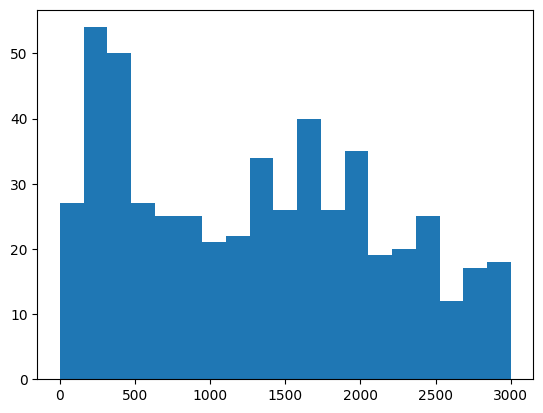

In [3]:
plt.hist(d.DegArea,bins=np.linspace(0,3000,20))

In [6]:
q=d

np.mean(q.P_massfill/q.P_2d)

1.1326565676696891

In [6]:
md = np.median(d.Mean_Dist)
ma = np.median(d.DegArea)

q1 = d[(d.Mean_Dist <= md) & (d.DegArea <= ma)]
q2 = d[(d.Mean_Dist > md) & (d.DegArea <= ma)]
q3 = d[(d.Mean_Dist <= md) & (d.DegArea > ma)]
q4 = d[(d.Mean_Dist > md) & (d.DegArea > ma)]

len(q1)

182

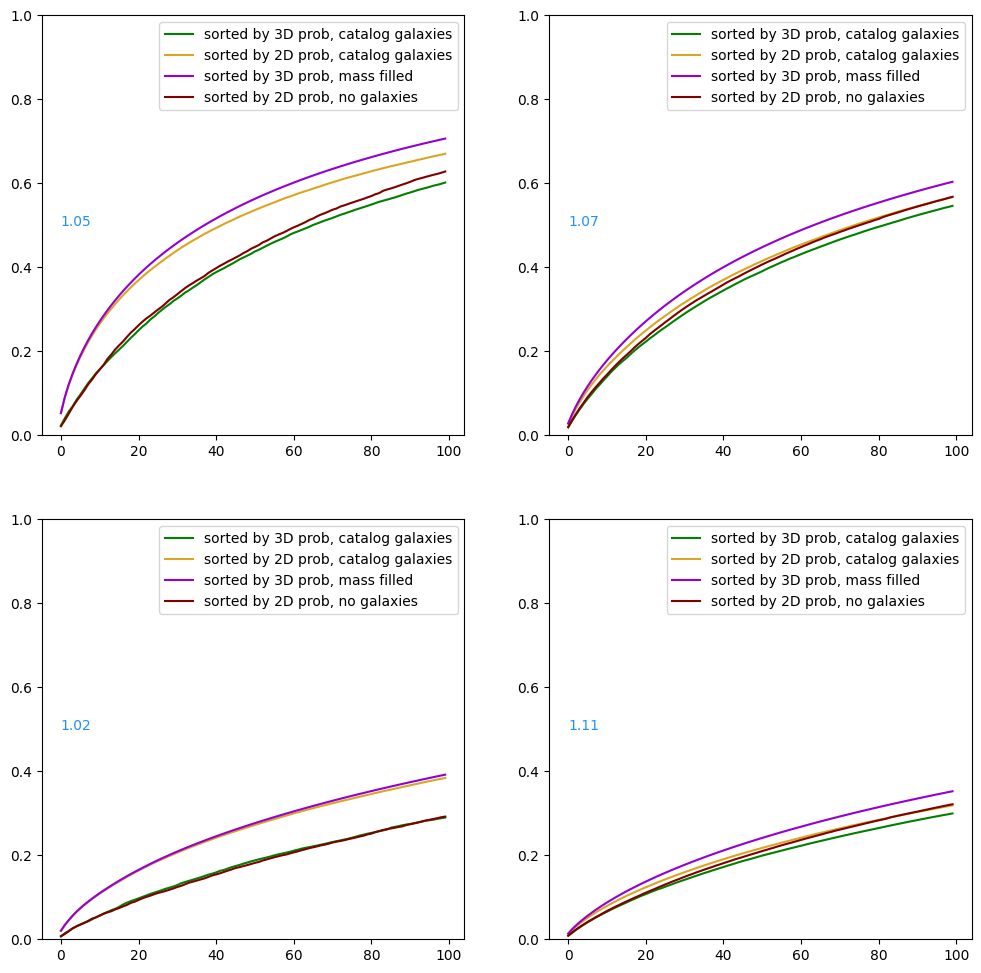

In [19]:
md = np.median(d.Mean_Dist)
ma = np.median(d.DegArea)

md, ma = 225, ma


q1 = d[(d.Mean_Dist <= md) & (d.DegArea <= ma)]
q2 = d[(d.Mean_Dist > md) & (d.DegArea <= ma)]
q3 = d[(d.Mean_Dist <= md) & (d.DegArea > ma)]
q4 = d[(d.Mean_Dist > md) & (d.DegArea > ma)]

nobs = 100

q0 = [q1,q2,q3,q4]



fig, axs = plt.subplots(nrows=2, ncols=2, layout=None, figsize=(12,12))
i=0
for ax in axs.flat:
    q = q0[i]
    i+=1
    a1 = np.zeros(nobs)
    a2 = np.zeros(nobs)
    a3 = np.zeros(nobs)
    a4 = np.zeros(nobs)


    for k in list(q['NSBH_num'])+list(q['BNS_num']):
        try:
            cs = pd.read_csv('BNS_GalCat/BNS_{}.csv'.format(int(k)))
        except:
            try:
                cs = pd.read_csv('BNS_GalCat/NSBH_{}.csv'.format(int(k)))
            except:
                continue
        sigma_m_nonempty, sigma_m_empty_nodist, sigma_m_empty_dist = np.array(cs['Filled3D']), np.array(cs['Unfilled2D']), np.array(cs['Unfilled3D'])

        order_dist = np.flip(np.argsort(sigma_m_empty_dist)[-nobs:])
        order_nodist = np.flip(np.argsort(sigma_m_empty_nodist)[-nobs:])
        order_all = np.flip(np.argsort(sigma_m_nonempty)[-nobs:])


        fullsum = np.sum(sigma_m_nonempty)
        a1 += np.cumsum((sigma_m_nonempty)[order_nodist]) / fullsum
        a2 += np.cumsum((sigma_m_nonempty)[order_dist]) / fullsum
        a3 += np.cumsum((sigma_m_nonempty)[order_all]) / fullsum
        a4 += np.cumsum((sigma_m_nonempty)[:nobs]) / fullsum

    if 1:
        
        ax.plot(a1/len(q), color='green', label='sorted by 3D prob, catalog galaxies')
        ax.plot(a2/len(q), color='goldenrod', label = 'sorted by 2D prob, catalog galaxies')
        ax.plot(a3/len(q), color='darkviolet', label = 'sorted by 3D prob, mass filled')
        ax.plot(a4/len(q), color='maroon', label = 'sorted by 2D prob, no galaxies')
        ax.legend()
        ax.text(0, 0.5, np.round(np.min(np.sum(a3)/np.array([np.sum(a1), np.sum(a2), np.sum(a4)])) , 2), color='dodgerblue')
        #ax.xlabel('Observation Number')
        #ax.ylabel('3D prob*galaxy mass (filled+catalog) covered')
        ax.set_ylim(0,1)
        #plt.title('BNS {}'.format(k))
        #plt.show()

        #print(k, a3[-1], a1[-1], a2[-1])

In [7]:
f = d.copy()

In [8]:
d = d[d.P_massfill/d.P_3dcat < 3]

In [6]:
f[f.P_massfill/f.P_3dcat > 3]

,Unnamed: 0.1,Unnamed: 0,BNS_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,Area99,DegArea,P_2d,NSBH_num
11,11,11.0,79.0,197.530132,0.617000,0.202000,0.211000,1872.0,776.384462,0.542887,NaN
68,68,68.0,357.0,117.082918,0.925484,0.277118,0.282767,346.0,138.548753,0.913492,NaN
106,106,106.0,559.0,319.194000,0.854910,0.101644,0.103829,1143.0,830.663000,0.842442,NaN
481,481,NaN,NaN,390.864276,0.422648,0.023573,0.025566,3817.0,1998.944431,0.418481,931.0
550,550,NaN,NaN,422.836765,0.318817,0.076365,0.078776,5341.0,2234.798603,0.313119,1368.0
554,554,NaN,NaN,591.411580,0.436975,0.062703,0.058343,4271.0,2014.589359,0.434484,1388.0


In [38]:
dist = np.arange(150,501,25)
degs = np.arange(250,3000,250)

q_arr = np.zeros((4, len(dist), len(degs)))





for m in range(len(dist)):
    for j in range(len(degs)):

        md, ma = dist[m], degs[j]


        q1 = d[(d.Mean_Dist <= md) & (d.DegArea <= ma)]
        q2 = d[(d.Mean_Dist > md) & (d.DegArea <= ma)]
        q3 = d[(d.Mean_Dist <= md) & (d.DegArea > ma)]
        q4 = d[(d.Mean_Dist > md) & (d.DegArea > ma)]

        nobs = 100

        q0 = [q1,q2,q3,q4]



        #fig, axs = plt.subplots(nrows=2, ncols=2, layout=None, figsize=(12,12))
        #i=0
        for i in range(4):
            q = q0[i]
            #i+=1
            a1 = np.zeros(nobs)
            a2 = np.zeros(nobs)
            a3 = np.zeros(nobs)
            a4 = np.zeros(nobs)
            
            full = list(q['NSBH_num'])+list(q['BNS_num'])

            for k in full:
                try:
                    cs = pd.read_csv('BNS_GalCat/BNS_{}.csv'.format(int(k)))
                except:
                    try:
                        cs = pd.read_csv('BNS_GalCat/NSBH_{}.csv'.format(int(k)))
                    except:
                        continue
                sigma_m_nonempty, sigma_m_empty_nodist, sigma_m_empty_dist = np.array(cs['Filled3D']), np.array(cs['Unfilled2D']), np.array(cs['Unfilled3D'])

                order_dist = np.flip(np.argsort(sigma_m_empty_dist)[-nobs:])
                order_nodist = np.flip(np.argsort(sigma_m_empty_nodist)[-nobs:])
                order_all = np.flip(np.argsort(sigma_m_nonempty)[-nobs:])


                fullsum = np.sum(sigma_m_nonempty)
                a1 += np.cumsum((sigma_m_nonempty)[order_nodist]) / fullsum
                a2 += np.cumsum((sigma_m_nonempty)[order_dist]) / fullsum
                a3 += np.cumsum((sigma_m_nonempty)[order_all]) / fullsum
                a4 += np.cumsum((sigma_m_nonempty)[:nobs]) / fullsum

            if 1:

                s = np.round(np.min(np.sum(a3)/np.array([np.sum(a1), np.sum(a2), np.sum(a4)])) , 3)
            q_arr[i,m,j] = s
            
            print(m,j)

                #print(k, a3[-1], a1[-1], a2[-1])

0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 2
0 2
0 2
0 2
0 3
0 3
0 3
0 3
0 4
0 4
0 4
0 4
0 5
0 5
0 5
0 5
0 6
0 6
0 6
0 6
0 7
0 7
0 7
0 7
0 8
0 8
0 8
0 8
0 9
0 9
0 9
0 9
0 10
0 10
0 10
0 10
1 0
1 0
1 0
1 0
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 3
1 3
1 3
1 3
1 4
1 4
1 4
1 4
1 5
1 5
1 5
1 5
1 6
1 6
1 6
1 6
1 7
1 7
1 7
1 7
1 8
1 8
1 8
1 8
1 9
1 9
1 9
1 9
1 10
1 10
1 10
1 10
2 0
2 0
2 0
2 0
2 1
2 1
2 1
2 1
2 2
2 2
2 2
2 2
2 3
2 3
2 3
2 3
2 4
2 4
2 4
2 4
2 5
2 5
2 5
2 5
2 6
2 6
2 6
2 6
2 7
2 7
2 7
2 7
2 8
2 8
2 8
2 8
2 9
2 9
2 9
2 9
2 10
2 10
2 10
2 10
3 0
3 0
3 0
3 0
3 1
3 1
3 1
3 1
3 2
3 2
3 2
3 2
3 3
3 3
3 3
3 3
3 4
3 4
3 4
3 4
3 5
3 5
3 5
3 5
3 6
3 6
3 6
3 6
3 7
3 7
3 7
3 7
3 8
3 8
3 8
3 8
3 9
3 9
3 9
3 9
3 10
3 10
3 10
3 10
4 0
4 0
4 0
4 0
4 1
4 1
4 1
4 1
4 2
4 2
4 2
4 2
4 3
4 3
4 3
4 3
4 4
4 4
4 4
4 4
4 5
4 5
4 5
4 5
4 6
4 6
4 6
4 6
4 7
4 7
4 7
4 7
4 8
4 8
4 8
4 8
4 9
4 9
4 9
4 9
4 10
4 10
4 10
4 10
5 0
5 0
5 0
5 0
5 1
5 1
5 1
5 1
5 2
5 2
5 2
5 2
5 3
5 3
5 3
5 3
5 4
5 4
5 4
5 4
5 5
5 5
5 5
5 5
5 6


In [32]:
i

4

In [42]:
t = q_arr

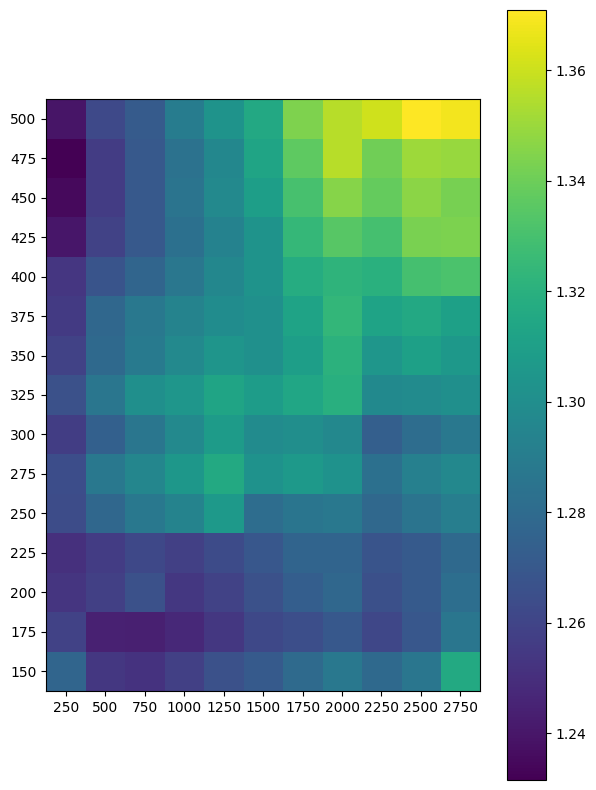

In [56]:
plt.figure(figsize=(7,10))
plt.imshow(q_arr[3]*q_arr[2]*q_arr[1]*q_arr[0], origin='lower')
plt.xticks(np.arange(11), labels=degs)
plt.yticks(np.arange(15), labels=dist)
plt.colorbar()

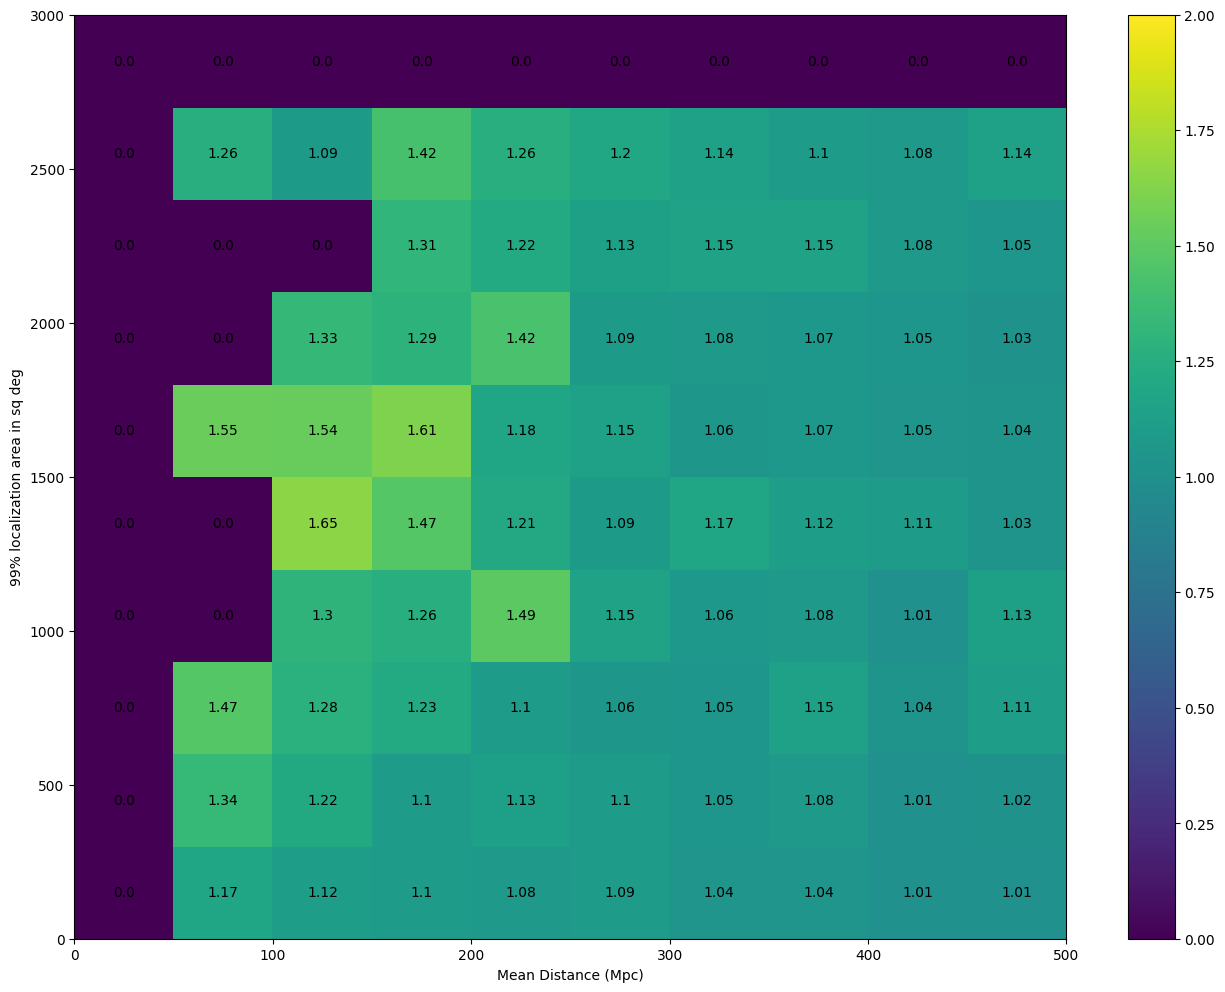

In [74]:
import numpy as np
import matplotlib.pyplot as plt
m = np.zeros((10,10))


dr = np.arange(50,501,50)
ta = np.arange(300,3000,300)

for i in range(len(dr)):
    for j in range(len(ta)):
        n = d[(np.abs(d.Mean_Dist - dr[i]) <= 25) & (np.abs(d.DegArea - ta[j]) <= 150)]
        if j == len(ta) - 1:
            n = d[(np.abs(d.Mean_Dist - dr[i]) <= 25) & (d.DegArea - ta[j] >= -150)]
        if len(n) != 0:
            m[j,i] = np.mean(n.P_massfill/n.P_2d)
            

            
size = 10
data = np.clip(m,0,2)

# Limits for the extent
x_start = 0
x_end = 500
y_start = 0
y_end = 3000

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='viridis', aspect='auto', vmin=0, vmax=2)

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax.text(text_x, text_y, np.round(label,2), color='black', ha='center', va='center')

fig.colorbar(im)
plt.ylabel('99% localization area in sq deg')
plt.xlabel('Mean Distance (Mpc)')
plt.show()

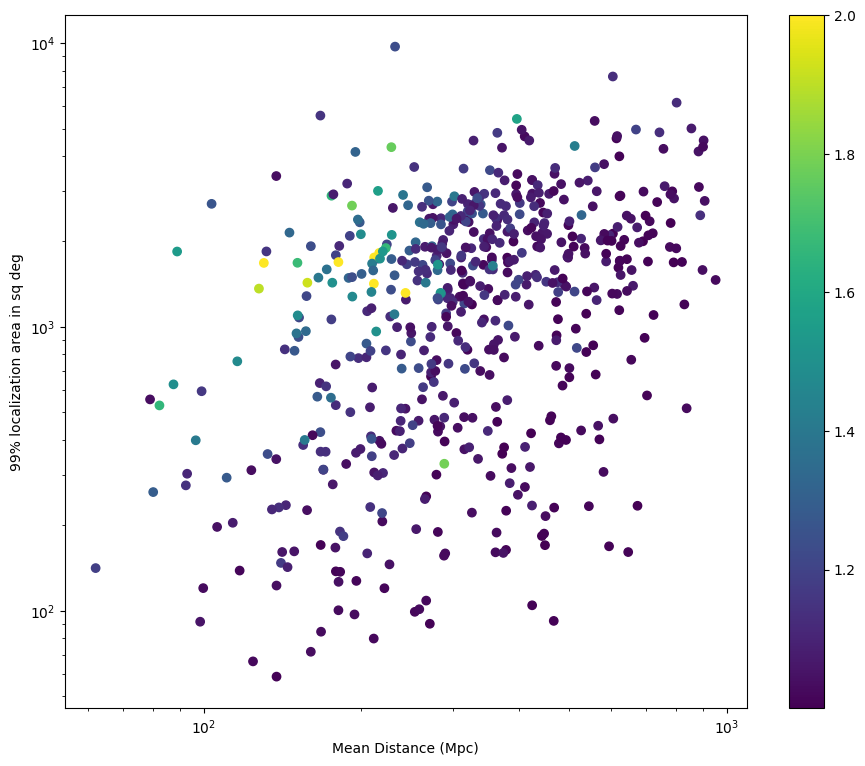

In [59]:
plt.figure(figsize=(11,9))
plt.scatter(d.Mean_Dist, d.DegArea, c = np.clip(d.P_massfill/d.P_2d, 1, 2), cmap='viridis')
plt.ylabel('99% localization area in sq deg')
plt.xlabel('Mean Distance (Mpc)')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [29]:
list(q['NSBH_num'])+list(q['BNS_num'])list(q['NSBH_num'])+list(q['BNS_num'])list(q['NSBH_num'])+list(q['BNS_num'])

nan

In [121]:
dis, ar= md,ma

q1 = d[(d.Mean_Dist <= dis) & (d.DegArea <= ar)]

np.mean(q1.P_massfill)

0.6430696236329114

In [115]:
d.DegArea[np.where(d.P_3dcat >= d.P_2d)[0]]

2      4297.673481
9       350.260166
13     1261.626390
15     9715.487076
25     5404.371809
26     2320.353933
30      613.155278
32     1734.016659
34      966.012003
42     1431.438771
43      515.089251
50     1579.770522
52     4134.706575
54     1644.736970
59     1263.908215
60     1087.683118
62     3566.020661
64     1208.869018
65     1720.640442
67      888.547972
68     2916.802054
74      145.669622
82     1822.234119
83     2414.315298
91      137.670119
92      313.777191
101    1423.321243
104    2297.378314
106      66.317184
107    1550.841175
116      79.811426
121    2663.886649
123    2553.047647
138    3631.944427
139    1326.842003
140    4958.248758
142    6167.012864
144    1428.370110
146    2355.827135
152    3185.139450
159    3647.563127
166     843.370456
167    4339.152866
170     159.858902
174    1657.365692
186    1011.202633
189    1186.457298
198    1294.568602
204     478.868554
208    2784.666017
211    2662.142495
219    1594.497474
220     740.

In [100]:
q1.loc[q1.index[71]]

Event_num      141.000000
Mean_Dist      288.257306
P_massfill       0.673907
P_3dcat          0.267502
P_2dcat          0.562040
Area99        1452.000000
DegArea        329.540144
P_2d             0.000705
Name: 185, dtype: float64

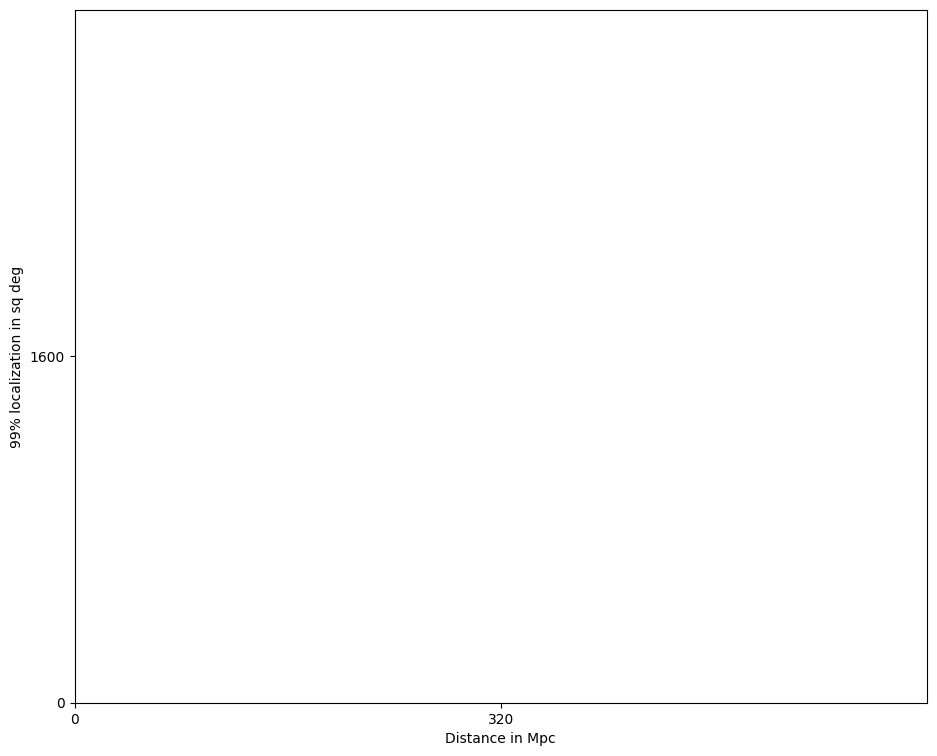

In [138]:
plt.figure(figsize=(11,9))
plt.xticks([0,320])
plt.xlabel('Distance in Mpc')
plt.yticks([0,1600])
plt.xlim(0,640)
plt.ylim(0,3200)
plt.ylabel('99% localization in sq deg')
'''plt.hlines([1500], -20, 520, color='k')

plt.vlines([250],-50,3050, color='k')
plt.ylim(-50,3050)'''
plt.show()

In [34]:
np.mean(d.P_massfill/d.P_2d)

1.1378567867286107

/home/tamojeet/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tamojeet/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Increase on sorting by 2D alone over 2D + catalog')

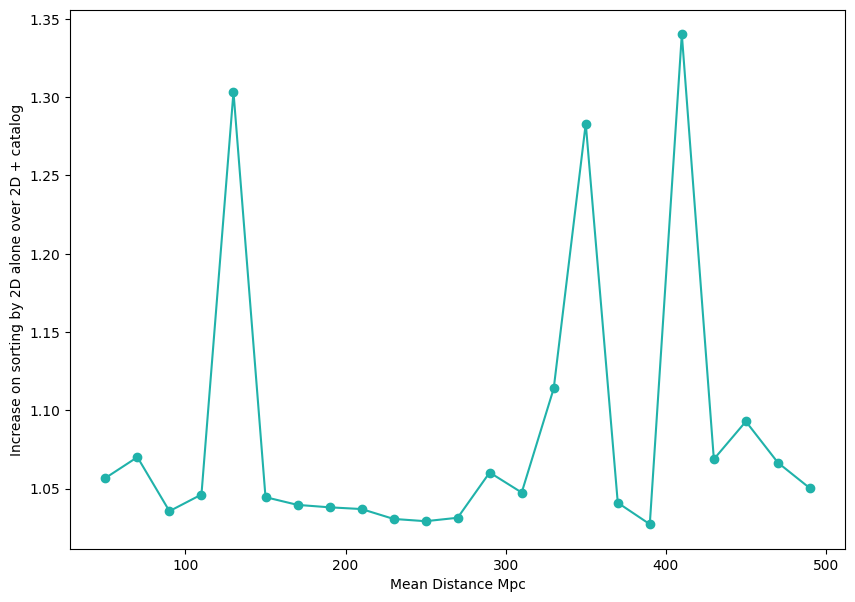

In [27]:
q=d

def binplot(x, y, x1, x2, n):
    y = np.array(y)
    x = np.array(x)
    xmid = [x1 + (i+0.5)*(x2 - x1)/n for i in range(n)]
    yarr = []
    for m in xmid:
        ynew = y[np.where(np.abs(x - m) <= (x2-x1)/2/n)]
        yarr.append(np.mean(ynew))
    #print(xmid,yarr)   
    plt.plot(xmid, yarr, marker = 'o', color='lightseagreen')
    #plt.show()

plt.figure(figsize=(10,7))
binplot(q.DegArea, 1/q.P_2dcat*q.P_massfill, 0, 500, 25)
plt.xlabel('Mean Distance Mpc')
plt.ylabel('Increase on sorting by 2D alone over 2D + catalog')

In [10]:
d.reset_index(drop=True, inplace=True)

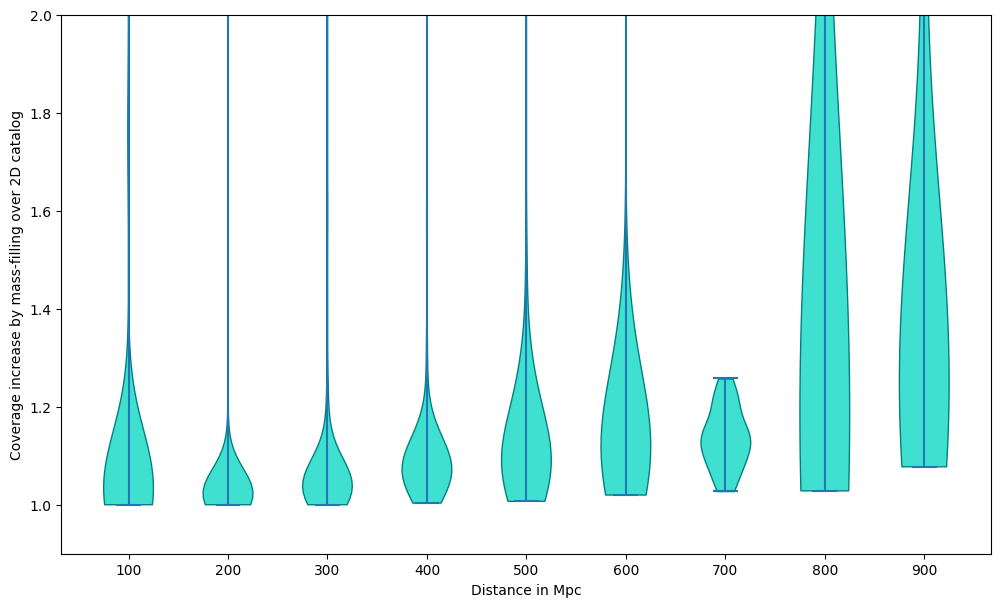

In [18]:
arr = d.P_2dcat/d.P_massfill

arr = 1/arr

#arr = d.P_massfill/np.array([max(d.P_3dcat[i], d.P_2dcat[i], d.P_2d[i]) for i in range(len(d))])

grouped = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(100,1000,100)]


fig, ax = plt.subplots(figsize=(12,7))
parts = ax.violinplot(grouped)

for pc in parts['bodies']:
    pc.set_facecolor('turquoise')
    pc.set_edgecolor('teal')
    pc.set_alpha(1)
ax.set_xticks(np.arange(1, 10), labels = np.arange(100,1000,100))
plt.xlabel('Distance in Mpc')
plt.ylabel('Coverage increase by mass-filling over 2D catalog')
#plt.yscale('log')
plt.ylim(0.9,2)
plt.show()

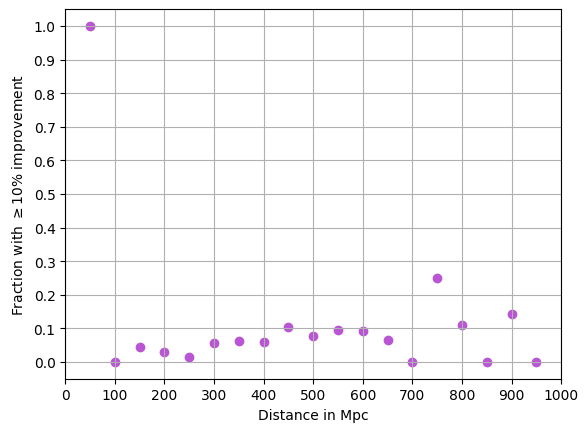

In [70]:
arr = d.P_3dcat/d.P_massfill
arr = d.P_massfill/np.array([max(d.P_2dcat[i], d.P_2d[i]) for i in range(len(d))])
#arr = 1/arr

gl = 50
grouped = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=gl/2)[0]]) for m in range(gl,1000,gl)]

thres = 1.1

h=1
for g in grouped:
    try:
        plt.scatter(gl*h, len(np.where(np.array(g)>=thres)[0])/len(g), color='mediumorchid')
    except:
        pass
    h+=1

plt.xlabel('Distance in Mpc')
plt.ylabel('Fraction with $\geq${}% improvement'.format(int((thres-1)*100)))
plt.xticks(np.arange(0,1001,100))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()

In [59]:
?plt.xticks

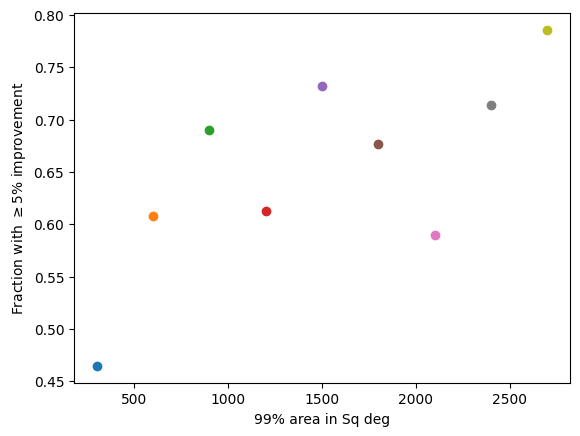

In [45]:
arr = d.P_2d/d.P_massfill
arr = 1/arr
#arr = d.P_massfill/np.array([max(d.P_3dcat[i], d.P_2dcat[i], d.P_2d[i]) for i in range(len(d))])


grouped = [list(arr[np.where(np.abs(d.Mean_Dist - m)<=50)[0]]) for m in range(100,1000,100)]
grouped = [list(arr[np.where(np.abs(d.DegArea - 3*m)<=150)[0]]) for m in range(100,1000,100)]

thres = 1.05

h=1
for g in grouped:
    plt.scatter(300*h, len(np.where(np.array(g)>=thres)[0])/len(g))
    h+=1

#plt.xlabel('Distance in Mpc')
plt.xlabel('99% area in Sq deg')
plt.ylabel('Fraction with $\geq${}% improvement'.format(int((thres-1)*100)))
plt.show()

In [63]:
[len(g) for g in grouped]

[37, 129, 160, 103, 55, 41, 20, 13, 8]

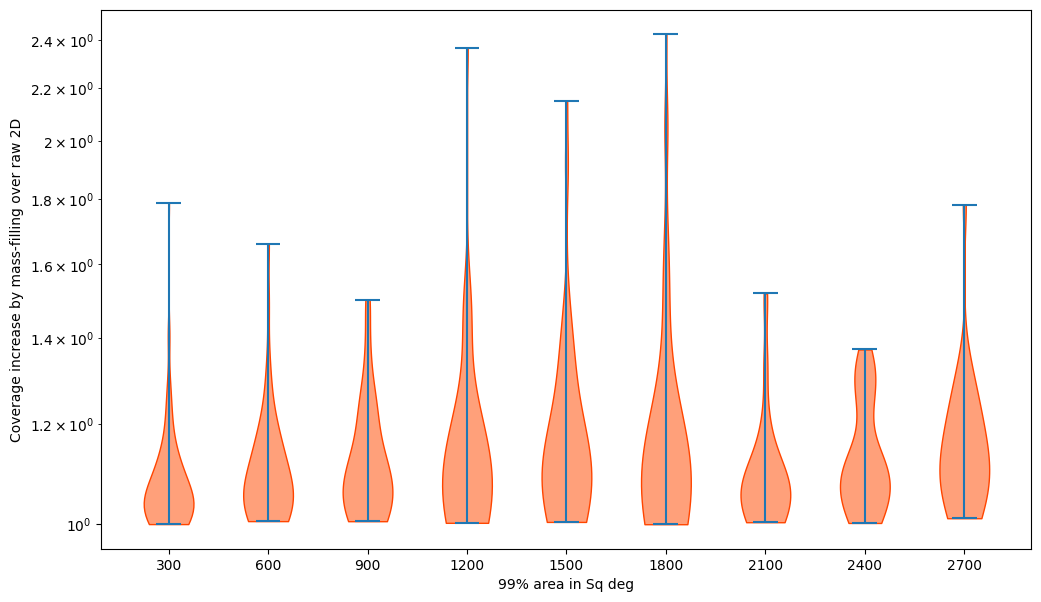

In [15]:


grouped = [list(arr[np.where(np.abs(d.DegArea - 3*m)<=150)[0]]) for m in range(100,1000,100)]

fig, ax = plt.subplots(figsize=(12,7))
#ax.violinplot(grouped)#

parts = ax.violinplot(grouped)

for pc in parts['bodies']:
    pc.set_facecolor('lightsalmon')
    pc.set_edgecolor('orangered')
    pc.set_alpha(1)


ax.set_xticks(np.arange(1, 10), labels = 3*np.arange(100,1000,100))
plt.xlabel('99% area in Sq deg')
plt.ylabel('Coverage increase by mass-filling over raw 2D')
plt.yscale('log')
plt.show()

In [60]:
[len(g) for g in grouped]

[99, 51, 42, 49, 56, 68, 39, 42, 28]

In [12]:
d[d.P_massfill/d.P_3dcat > 2]

,Unnamed: 0.1,Unnamed: 0,BNS_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,Area99,DegArea,P_2d,NSBH_num
9,9,9.0,74.0,137.557174,0.814000,0.351000,0.356000,582.0,342.116410,0.779513,NaN
78,80,80.0,415.0,130.240000,0.322000,0.139000,0.183000,3672.0,1680.485564,0.154397,NaN
115,118,118.0,609.0,198.617811,0.140502,0.069125,0.100865,2868.0,2336.326710,0.110105,NaN
209,212,212.0,1104.0,191.987889,0.177558,0.087447,0.176340,6533.0,2675.387573,0.099577,NaN
211,214,214.0,1110.0,281.877703,0.321354,0.126479,0.143335,2749.0,1662.099824,0.300255,NaN
312,315,NaN,NaN,882.690000,0.427000,0.201000,0.167000,7513.0,4149.197477,0.407794,77.0
320,323,NaN,NaN,209.261698,0.666669,0.276714,0.277946,692.0,403.083107,0.529721,122.0
328,331,NaN,NaN,288.257306,0.673907,0.267502,0.562040,1452.0,329.540144,0.376700,141.0
336,339,NaN,NaN,431.795318,0.487624,0.218487,0.215149,4938.0,2086.414396,0.467332,171.0
358,362,NaN,NaN,791.200000,0.702000,0.337000,0.161000,2623.0,1687.711344,0.701888,273.0


In [76]:
d[d.P_massfill/d.P_3dcat>5]

,Unnamed: 0.1,Unnamed: 0,BNS_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,Area99,DegArea,P_2d,NSBH_num
106,106,106.0,559.0,319.194000,0.854910,0.101644,0.103829,1143.0,830.663000,0.842442,NaN
481,481,NaN,NaN,390.864276,0.422648,0.023573,0.025566,3817.0,1998.944431,0.418481,931.0
554,554,NaN,NaN,591.411580,0.436975,0.062703,0.058343,4271.0,2014.589359,0.434484,1388.0


In [69]:
[len(i) for i in grouped]

[38, 128, 155, 92, 46, 36, 17, 11, 7]

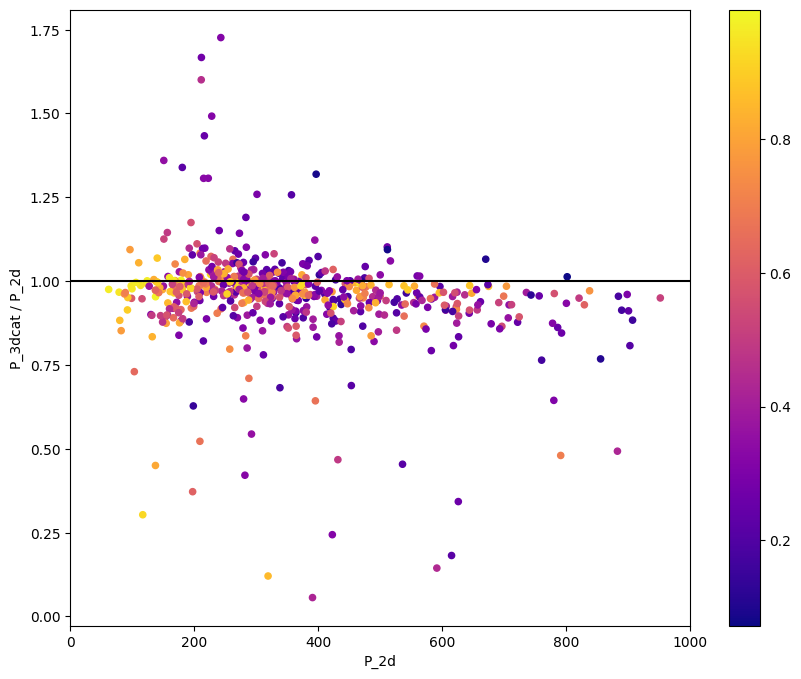

In [64]:
b = 'P_' + '3dcat'
a = 'P_' + '2d'

#a,b=b,a

plt.figure(figsize=(10,8))

plt.scatter(d.Mean_Dist, d[b]/d[a],  c = d.P_massfill, cmap='plasma', s=20)#, vmax=4000)
plt.plot([0,1000], [1,1], color='k')
plt.colorbar()
plt.xlabel(a)
plt.ylabel(b+' / '+a)
plt.xlim(0,1000)
#plt.ylim(0.8,2)
plt.show()

In [212]:
np.mean(d.P_massfill/d.P_3dcat)

1.2671615647183512

In [79]:
d.loc[np.where(np.abs(d.Mean_Dist - 650)<50)[0]]

,Unnamed: 0,Event_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,P_2d,DegArea
55,55,NSBH 300,605.35,0.158,0.128,0.124,0.139897,7624.771308
57,57,NSBH 69,622.73,0.561,0.514,0.513,0.556538,1145.345103
59,59,NSBH 633,670.26,0.099,0.088,0.087,0.082599,4958.248758
64,64,NSBH 177,615.15,0.217,0.039,0.038,0.214523,4614.847182
67,67,NSBH 730,623.01,0.735,0.669,0.622,0.730513,3989.902474
72,72,NSBH 797,696.31,0.537,0.461,0.427,0.532818,915.169266
74,74,NSBH 859,699.19,0.679,0.647,0.616,0.677351,2466.115353
85,85,NSBH 1021,616.90,0.176,0.153,0.153,0.168207,4703.051527
91,91,NSBH 1085,626.52,0.241,0.190,0.180,0.227811,1523.642868
93,93,NSBH 1067,626.58,0.513,0.456,0.454,0.508917,1927.814432


In [160]:
d = pd.read_csv('All.csv')
d

,Unnamed: 0,Event_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,P_2d,DegArea
0,0,BNS 33,298.21,0.221,0.184,0.215,0.183246,2764.129590
1,1,BNS 40,103.48,0.642,0.374,0.639,0.506843,2713.876980
2,2,BNS 55,228.32,0.321,0.268,0.314,0.180973,4297.673481
3,3,BNS 77,214.84,0.222,0.155,0.219,0.182602,1740.035956
4,4,BNS 88,424.51,0.196,0.167,0.175,0.180832,2948.380417
...,...,...,...,...,...,...,...,...
98,98,NSBH 718,485.10,0.836,0.816,0.820,0.825545,621.259691
99,99,NSBH 721,506.84,0.450,0.400,0.390,0.444990,2083.568672
100,100,NSBH 735,441.35,0.345,0.313,0.311,0.328535,2035.597887
101,101,NSBH 748,674.78,0.867,0.850,0.833,0.863540,234.346069


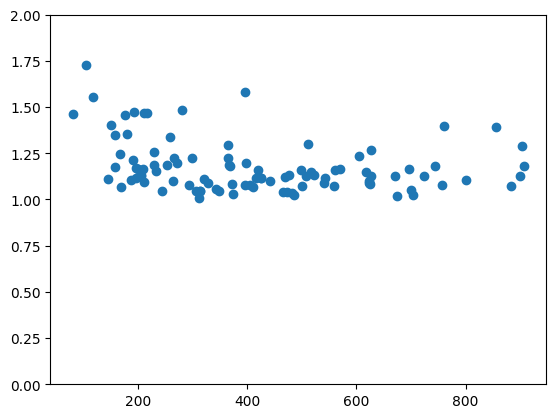

In [51]:
plt.scatter(d.Mean_Dist, d.P_massfill/d.P_3dcat)
plt.ylim(0,2)
plt.show()

In [29]:
import seaborn as sns

/tmp/ipykernel_3164/3765423504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dn['ndist'] = np.round(dn['Mean_Dist']/k)*k
/tmp/ipykernel_3164/3765423504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dn['ratio'] = dn['P_massfill']/dn['P_2d']


<AxesSubplot: xlabel='ndist', ylabel='ratio'>

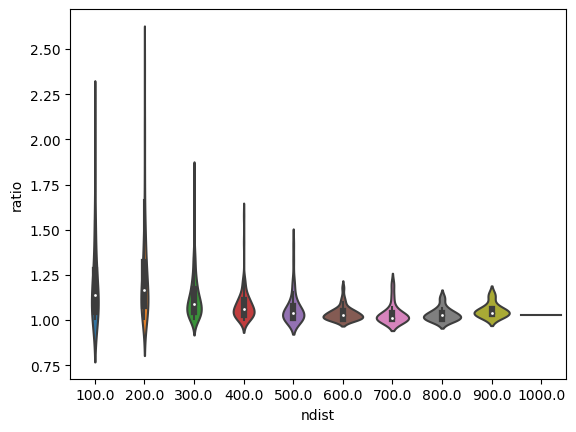

In [44]:
k=100

dn['ndist'] = np.round(dn['Mean_Dist']/k)*k
dn['ratio'] = dn['P_massfill']/dn['P_2d']
sns.violinplot(dn, x='ndist',y='ratio')

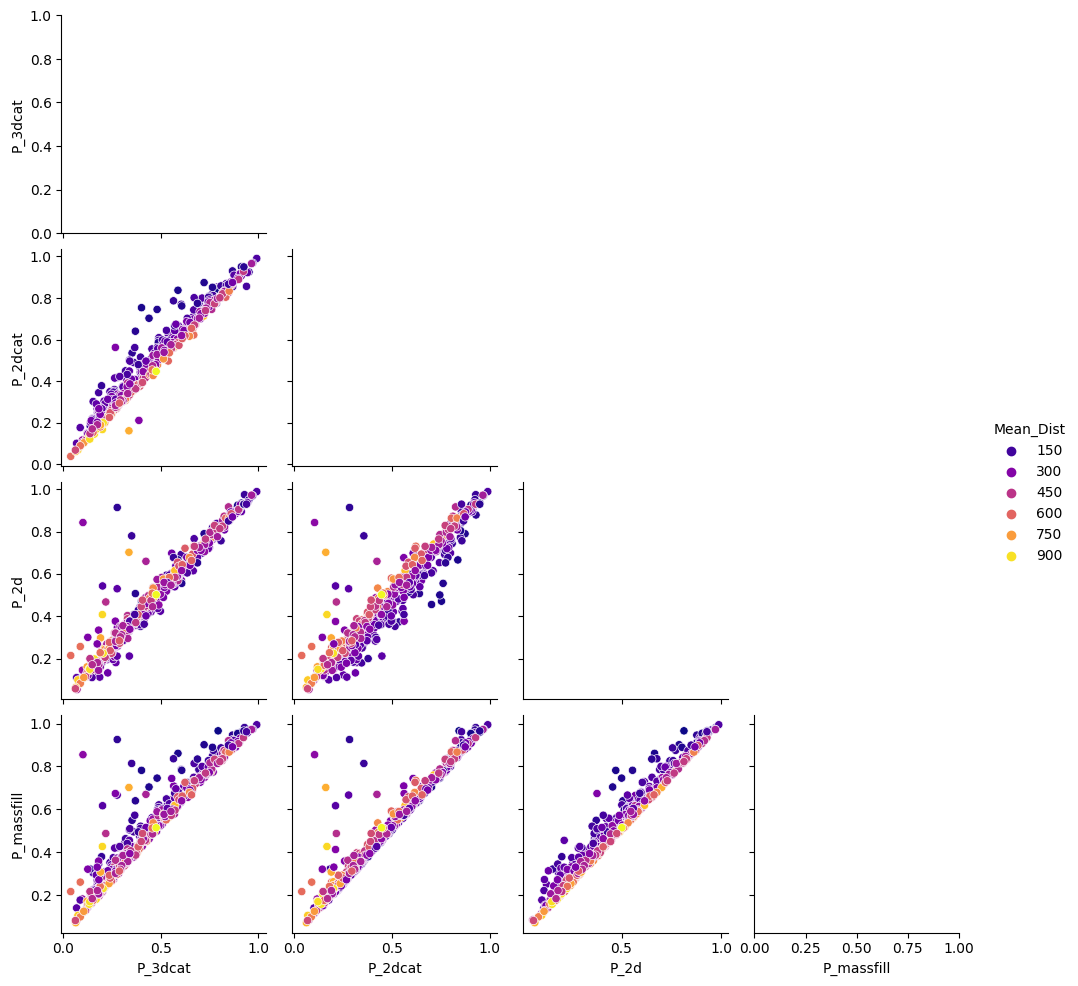

In [30]:
dn = d[['P_3dcat', 'P_2dcat', 'P_2d', 'P_massfill', 'Mean_Dist']]

#dn['DegArea'] = np.clip(dn['DegArea'], 0, 4000)

sns.pairplot(dn, corner=True, hue = 'Mean_Dist', palette = 'plasma', diag_kind="none")

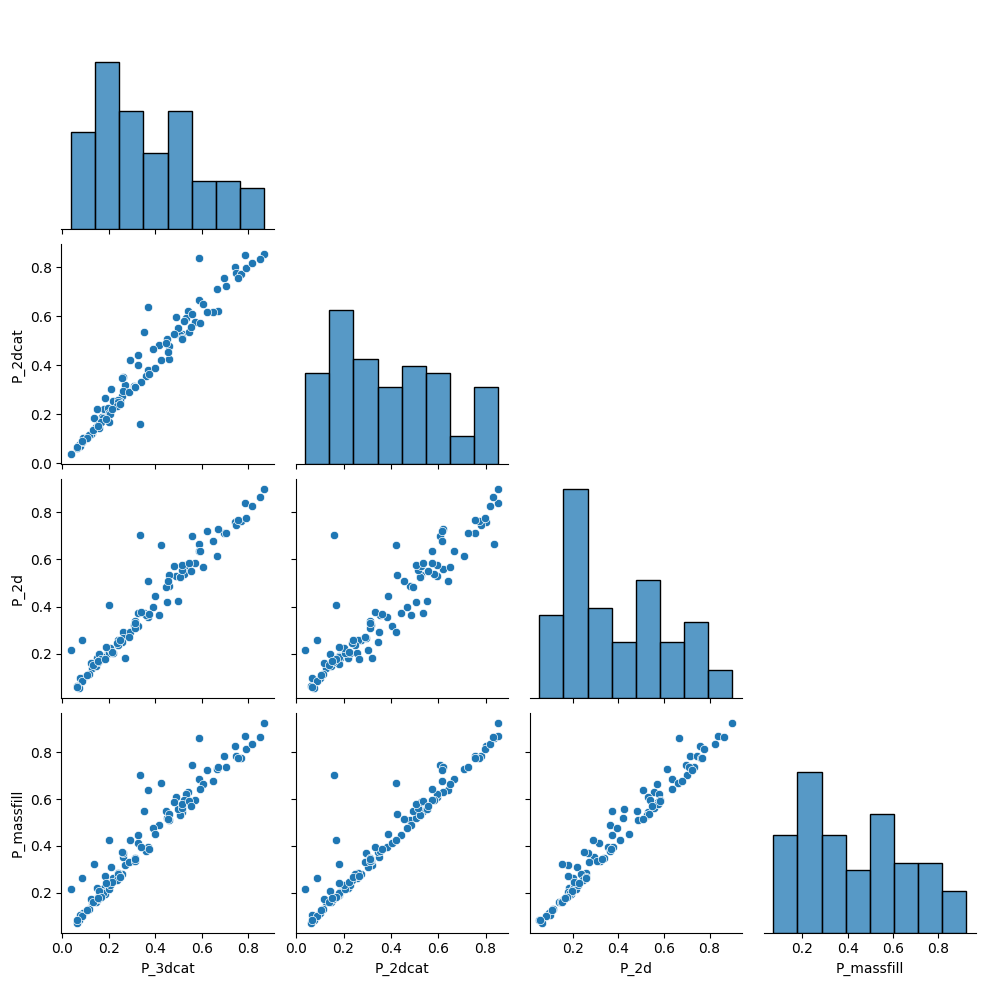

In [149]:
dn = d[['P_3dcat', 'P_2dcat', 'P_2d', 'P_massfill']]

#dn['DegArea'] = np.clip(dn['DegArea'], 0, 4000)

sns.pairplot(dn, corner=True)